# Machine Learning Problem Set

## Assignment 4

Rishabh Kaushick <br>
NUID: 002808996 <br>
kaushick.r@northeastern.edu <br> <br>
December 1, 2023

In [58]:
# library imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import mglearn

In [19]:
# loading the datasets
master_data = pd.read_csv('data/churn_test/wls_churn_master_target_t1.csv')
demographic_data = pd.read_csv('data/churn_test/wls_customer_demographics_t1.csv')
billing_data = pd.read_csv('data/churn_test/wls_billing.csv')

## Exploratory Data Analysis

### Analyzing Dataset 1 - Master Data with Target Variable:

In [20]:
master_data.head()

,Customer_ID,mrc_current_month,mvsf_br_amt_current_month,mvsf_mrc_current_month,num_subs_current_month,num_voice_subs_current_month,num_nonvoice_subs_current_month,rev_current_month,churn
0,0,161.66,131.66,130.00,2,2,0,131.66,0.0
1,1,46.92,45.00,35.00,1,0,1,46.92,0.0
2,2,229.15,229.15,155.00,2,2,0,229.15,0.0
3,3,101.53,91.53,75.00,1,1,0,91.53,0.0
4,4,559.90,460.39,330.97,6,4,2,475.55,1.0


In [21]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9590 entries, 0 to 9589
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Customer_ID                      9590 non-null   int64  
 1   mrc_current_month                9590 non-null   float64
 2   mvsf_br_amt_current_month        9581 non-null   float64
 3   mvsf_mrc_current_month           9590 non-null   float64
 4   num_subs_current_month           9590 non-null   int64  
 5   num_voice_subs_current_month     9590 non-null   int64  
 6   num_nonvoice_subs_current_month  9590 non-null   int64  
 7   rev_current_month                9590 non-null   float64
 8   churn                            9590 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 674.4 KB


In [22]:
master_data.columns

Index(['Customer_ID', 'mrc_current_month', 'mvsf_br_amt_current_month',
       'mvsf_mrc_current_month', 'num_subs_current_month',
       'num_voice_subs_current_month', 'num_nonvoice_subs_current_month',
       'rev_current_month', 'churn'],
      dtype='object')

From the above cells, we can see that there are a total of 9 colums. Each of them have either integer or floating point data values. However, many of the column names are not easy to understand.

The first feedback I would provide to my colleague is that while modelling the data, it would be better to create a data dictionary, or a file in which the column name is provided with the column description.

In [23]:
master_data['mvsf_br_amt_current_month'].isna().sum()

9

In [24]:
# this shows the records which are having a null value in one of the columns.
master_data[master_data.isna().any(axis=1)]

,Customer_ID,mrc_current_month,mvsf_br_amt_current_month,mvsf_mrc_current_month,num_subs_current_month,num_voice_subs_current_month,num_nonvoice_subs_current_month,rev_current_month,churn
549,549,35.0,NaN,35.0,1,0,1,0.0,0.0
1115,1115,185.0,NaN,185.0,3,2,1,150.0,0.0
1566,1566,35.0,NaN,35.0,1,0,1,0.0,0.0
1705,1705,35.0,NaN,35.0,1,0,1,0.0,0.0
3596,3596,35.0,NaN,35.0,1,0,1,0.0,0.0
4070,4070,35.0,NaN,35.0,1,0,1,0.0,0.0
4163,4163,75.0,NaN,75.0,1,1,0,75.0,0.0
5668,5668,35.0,NaN,35.0,1,0,1,0.0,0.0
6714,6714,35.0,NaN,35.0,1,0,1,0.0,0.0


As shown above, we can see that there are a total of 9 records with NaN value in the 'mvsf_br_amt_current_month' column.

Additionally I would like to ask more details to my colleague about the rows which have null records in mvsf_br_amt_current_month column. While modelling the data it would be better to understand the reason behind the null columns. This will also help us understand whether we can drop these rows, or the best way to fill those values. 

### Analyzing Dataset 2 - Demographic Data

In [25]:
demographic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9590 entries, 0 to 9589
Data columns (total 93 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Customer_ID                                       9590 non-null   int64
 1   n_distinct_srvc_prov_state_cd_current_month       9590 non-null   int64
 2   n_distinct_sls_indust_typ_txt_current_month       9590 non-null   int64
 3   n_distinct_clli_exch_cd_current_month             9590 non-null   int64
 4   n_distinct_billg_prov_state_cd_current_month      9590 non-null   int64
 5   n_distinct_pymt_mthd_cd_current_month             9590 non-null   int64
 6   n_distinct_rgnl_cust_prov_state_cd_current_month  9590 non-null   int64
 7   n_distinct_cbu_cust_prov_state_cd_current_month   9590 non-null   int64
 8   srvc_prov_state_cd_ab_ind_current_month           9590 non-null   int64
 9   srvc_prov_state_cd_bc_ind_current_month  

From the above, we can see that there are a total of 92 columns in the demographic dataset. This is too many columns which would make the model extremely complex.

Even in the demographic dataset, the column names are difficult to interpret.

In [26]:
demographic_data.head(10)

,Customer_ID,n_distinct_srvc_prov_state_cd_current_month,n_distinct_sls_indust_typ_txt_current_month,n_distinct_clli_exch_cd_current_month,n_distinct_billg_prov_state_cd_current_month,n_distinct_pymt_mthd_cd_current_month,n_distinct_rgnl_cust_prov_state_cd_current_month,n_distinct_cbu_cust_prov_state_cd_current_month,srvc_prov_state_cd_ab_ind_current_month,srvc_prov_state_cd_bc_ind_current_month,...,pymt_mthd_cd_tbsqbsb_ind_current_month,pymt_mthd_cd_tbsqbsh_ind_current_month,pymt_mthd_cd_tcso_ind_current_month,pymt_mthd_cd_tcsobpr_ind_current_month,pymt_mthd_cd_tcsoothr_ind_current_month,pymt_mthd_cd_tcsqothr_ind_current_month,pymt_mthd_cd_teso_ind_current_month,pymt_mthd_cd_tesobsb_ind_current_month,pymt_mthd_cd_tesoothr_ind_current_month,pymt_mthd_cd_tpsoothr_ind_current_month
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Analyzing Dataset 3 - Billing Data

In [27]:
billing_data.head(10)

,Customer_ID,write_off_ind_n_ind_current_month,write_off_ind_y_ind_current_month,payment_method_cd_c_ind_current_month,payment_method_cd_ca_ind_current_month,payment_method_cd_cc_ind_current_month,payment_method_cd_d_ind_current_month,payment_method_cd_dd_ind_current_month,payment_method_cd_r_ind_current_month,kb_payment_method_cd_c_ind_current_month,kb_payment_method_cd_d_ind_current_month,kb_payment_method_cd_r_ind_current_month,auto_payment_method_cd_ca_ind_current_month,auto_payment_method_cd_cc_ind_current_month,auto_payment_method_cd_dd_ind_current_month,kb_auto_payment_method_cd_c_ind_current_month,kb_auto_payment_method_cd_d_ind_current_month,kb_auto_payment_method_cd_r_ind_current_month
0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,3,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
5,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,7,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
8,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,9,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [28]:
billing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9590 entries, 0 to 9589
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   Customer_ID                                    9590 non-null   int64
 1   write_off_ind_n_ind_current_month              9590 non-null   int64
 2   write_off_ind_y_ind_current_month              9590 non-null   int64
 3   payment_method_cd_c_ind_current_month          9590 non-null   int64
 4   payment_method_cd_ca_ind_current_month         9590 non-null   int64
 5   payment_method_cd_cc_ind_current_month         9590 non-null   int64
 6   payment_method_cd_d_ind_current_month          9590 non-null   int64
 7   payment_method_cd_dd_ind_current_month         9590 non-null   int64
 8   payment_method_cd_r_ind_current_month          9590 non-null   int64
 9   kb_payment_method_cd_c_ind_current_month       9590 non-null   int64
 10  

From the above columns in the dataset, we can see that multiple columns have a similar name:
1. write off ind:
    - write_off_ind_**n_ind**_current_month
    - write_off_ind_**y_ind**_current_month
2. payment_method_cd
    - payment_method_cd_**c_ind**_current_month
    - payment_method_cd_**ca_ind**_current_month
    - payment_method_cd_**cc_ind**_current_month
    - payment_method_cd_**d_ind**_current_month
    - payment_method_cd_**dd_ind**_current_month
    - payment_method_cd_**r_ind**_current_month
3. kb_payment_method_cd
    - kb_payment_method_cd_**c_ind**_current_month
    - kb_payment_method_cd_**d_ind**_current_month
    - kb_payment_method_cd_**r_ind**_current_month
4. ...
<br> <br>
We can see that the text in bold is the one which is changing. We can take an educated guess and say that ind stands for indicator. Since we can see that the values of all these columns are either 0 and 1, it looks like it is one hot encoded.

### Merging All Three Data Frames

In [29]:
# Using the merge function to combine the master data and demographic data on primary key - Customer ID column using an outer join.
master_data = master_data.merge(demographic_data, on=['Customer_ID'], how='outer')

In [30]:
# Similarly merging master data and billing data
master_data = master_data.merge(billing_data, on=['Customer_ID'], how='outer')

In [31]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9590 entries, 0 to 9589
Columns: 118 entries, Customer_ID to kb_auto_payment_method_cd_r_ind_current_month
dtypes: float64(5), int64(113)
memory usage: 8.6 MB


### Handling Null Values

In [33]:
# first understanding the column containing null values
master_data['mvsf_br_amt_current_month'].describe()

count     9581.000000
mean       242.222068
std        305.696945
min      -1317.090000
25%        100.000000
50%        168.000000
75%        276.260000
max      10000.000000
Name: mvsf_br_amt_current_month, dtype: float64

Text(0, 0.5, 'Frequency')

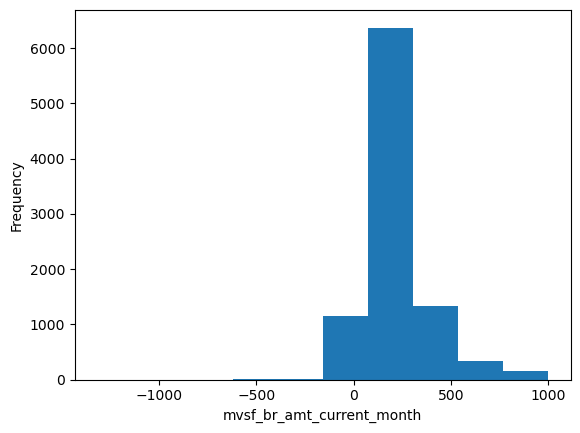

In [34]:
plt.hist(master_data['mvsf_br_amt_current_month'], bins=10, range=(-1317,1000))
plt.xlabel('mvsf_br_amt_current_month')
plt.ylabel('Frequency')

In [35]:
# filling the null rows with the mean value
master_data['mvsf_br_amt_current_month'] = master_data['mvsf_br_amt_current_month'].fillna(master_data['mvsf_br_amt_current_month'].mean())

In [37]:
master_data['mvsf_br_amt_current_month'].isna().sum()

0

In [36]:
master_data.isnull().sum()

Customer_ID                                      0
mrc_current_month                                0
mvsf_br_amt_current_month                        0
mvsf_mrc_current_month                           0
num_subs_current_month                           0
                                                ..
auto_payment_method_cd_cc_ind_current_month      0
auto_payment_method_cd_dd_ind_current_month      0
kb_auto_payment_method_cd_c_ind_current_month    0
kb_auto_payment_method_cd_d_ind_current_month    0
kb_auto_payment_method_cd_r_ind_current_month    0
Length: 118, dtype: int64

### Analyzing Target Variable - Churn

In [38]:
master_data['churn'].value_counts()

churn
0.0    9174
1.0     416
Name: count, dtype: int64

<Axes: ylabel='churn'>

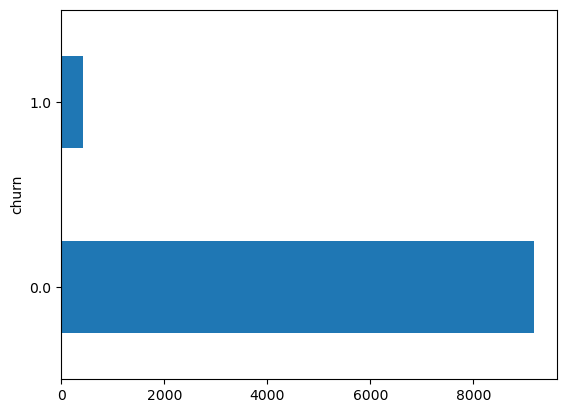

In [43]:
master_data['churn'].value_counts().plot(kind='barh')

Here, I would suggest to my colleague that while data collection and data modelling, we should try to collect enough data points for all categories in the target column.

## Splitting the Dataset into Train & Test

In [45]:
from sklearn.model_selection import train_test_split

master_data_wo_label = master_data.drop(columns=['churn'])
X_train, X_test, y_train, y_test = train_test_split(master_data_wo_label, master_data['churn'], random_state=0)
# by default setting the train size to be 25 %

In [51]:
len(X_train)

7192

In [52]:
len(X_test)

2398

## Applying PCA for Dimentionality Reduction

In [72]:
from sklearn.decomposition import PCA

# applying PCA using 2 components on the train set
pca_2 = PCA(n_components=2)
pca_2.fit(X_train)
X_train_pca_2 = pca_2.transform(X_train)

# applying PCA using 2 components on the test set
pca_2_test = PCA(n_components=2)
pca_2_test.fit(X_test)
X_test_pca_2 = pca_2_test.transform(X_test)

print("Original X_train shape: {}".format(str(X_train.shape)))
print("Reduced X_train shape: {}".format(str(X_train_pca_2.shape)))
print() # adding an extra line
print("Original X_test shape: {}".format(str(X_test.shape)))
print("Reduced X_test shape: {}".format(str(X_test_pca_2.shape)))

Original X_train shape: (7192, 117)
Reduced X_train shape: (7192, 2)

Original X_test shape: (2398, 117)
Reduced X_test shape: (2398, 2)


In [92]:
# similarly let us apply PCA using 5 components
pca_5 = PCA(n_components=5)
pca_5.fit(X_train)
X_train_pca_5 = pca_5.transform(X_train)

pca_5_test = PCA(n_components=5)
pca_5_test.fit(X_test)
X_test_pca_5 = pca_5_test.transform(X_test)

print("Original shape: {}".format(str(X_train.shape)))
print("Reduced shape: {}".format(str(X_train_pca_5.shape)))
print() # adding an extra line
print("Original X_test shape: {}".format(str(X_test.shape)))
print("Reduced X_test shape: {}".format(str(X_test_pca_5.shape)))

Original shape: (7192, 117)
Reduced shape: (7192, 5)

Original X_test shape: (2398, 117)
Reduced X_test shape: (2398, 5)


In [93]:
# similarly let us apply PCA using 10 components
pca_10 = PCA(n_components=10)
pca_10.fit(X_train)
X_train_pca_10 = pca_10.transform(X_train)

pca_10_test = PCA(n_components=10)
pca_10_test.fit(X_test)
X_test_pca_10 = pca_10_test.transform(X_test)

print("Original shape: {}".format(str(X_train.shape)))
print("Reduced shape: {}".format(str(X_train_pca_10.shape)))
print() # adding an extra line
print("Original X_test shape: {}".format(str(X_test.shape)))
print("Reduced X_test shape: {}".format(str(X_test_pca_10.shape)))

Original shape: (7192, 117)
Reduced shape: (7192, 10)

Original X_test shape: (2398, 117)
Reduced X_test shape: (2398, 10)


Text(0, 0.5, 'Second principal component')

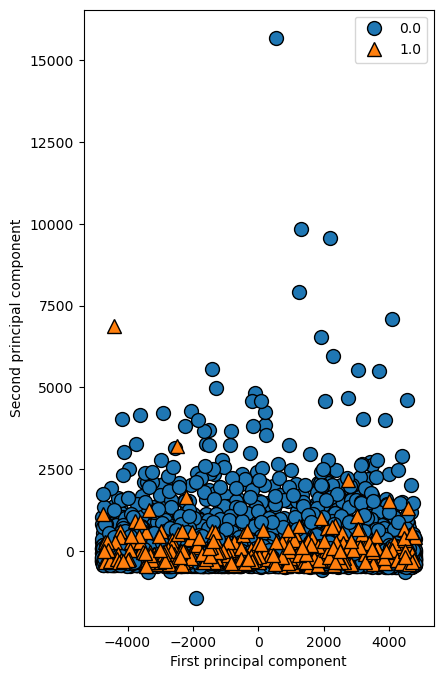

In [81]:
# Let us visualize the first vs. second principal component, colored by target class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_train_pca_2[:, 0], X_train_pca_2[:, 1], y_train)
plt.legend(y_train.unique(), loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

The above figure shows that most of the data is very close to each other on the bottom of the graph. It does not seem to create any meaningful clusters. It is most likely possible that we need a higher dimension for there to be a clear separation of clusters.

## Random Forest (without PCA)

In [97]:
# Let us try to train a model with random forest without performing 
# feature reduction

classifier_rf = RandomForestClassifier(random_state=23,
                                        n_jobs=-1,
                                        max_depth=5,
                                        n_estimators=100,
                                        oob_score=True)

# OOB score refers to Out Of the Bag Score                                        

In [98]:
%%time

classifier_rf.fit(X_train, y_train)

CPU times: user 10.8 s, sys: 76.3 ms, total: 10.9 s
Wall time: 1.66 s


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=23)

In [99]:
y_train_pred = classifier_rf.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.957313681868743

In [100]:
y_test_pred = classifier_rf.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9545454545454546

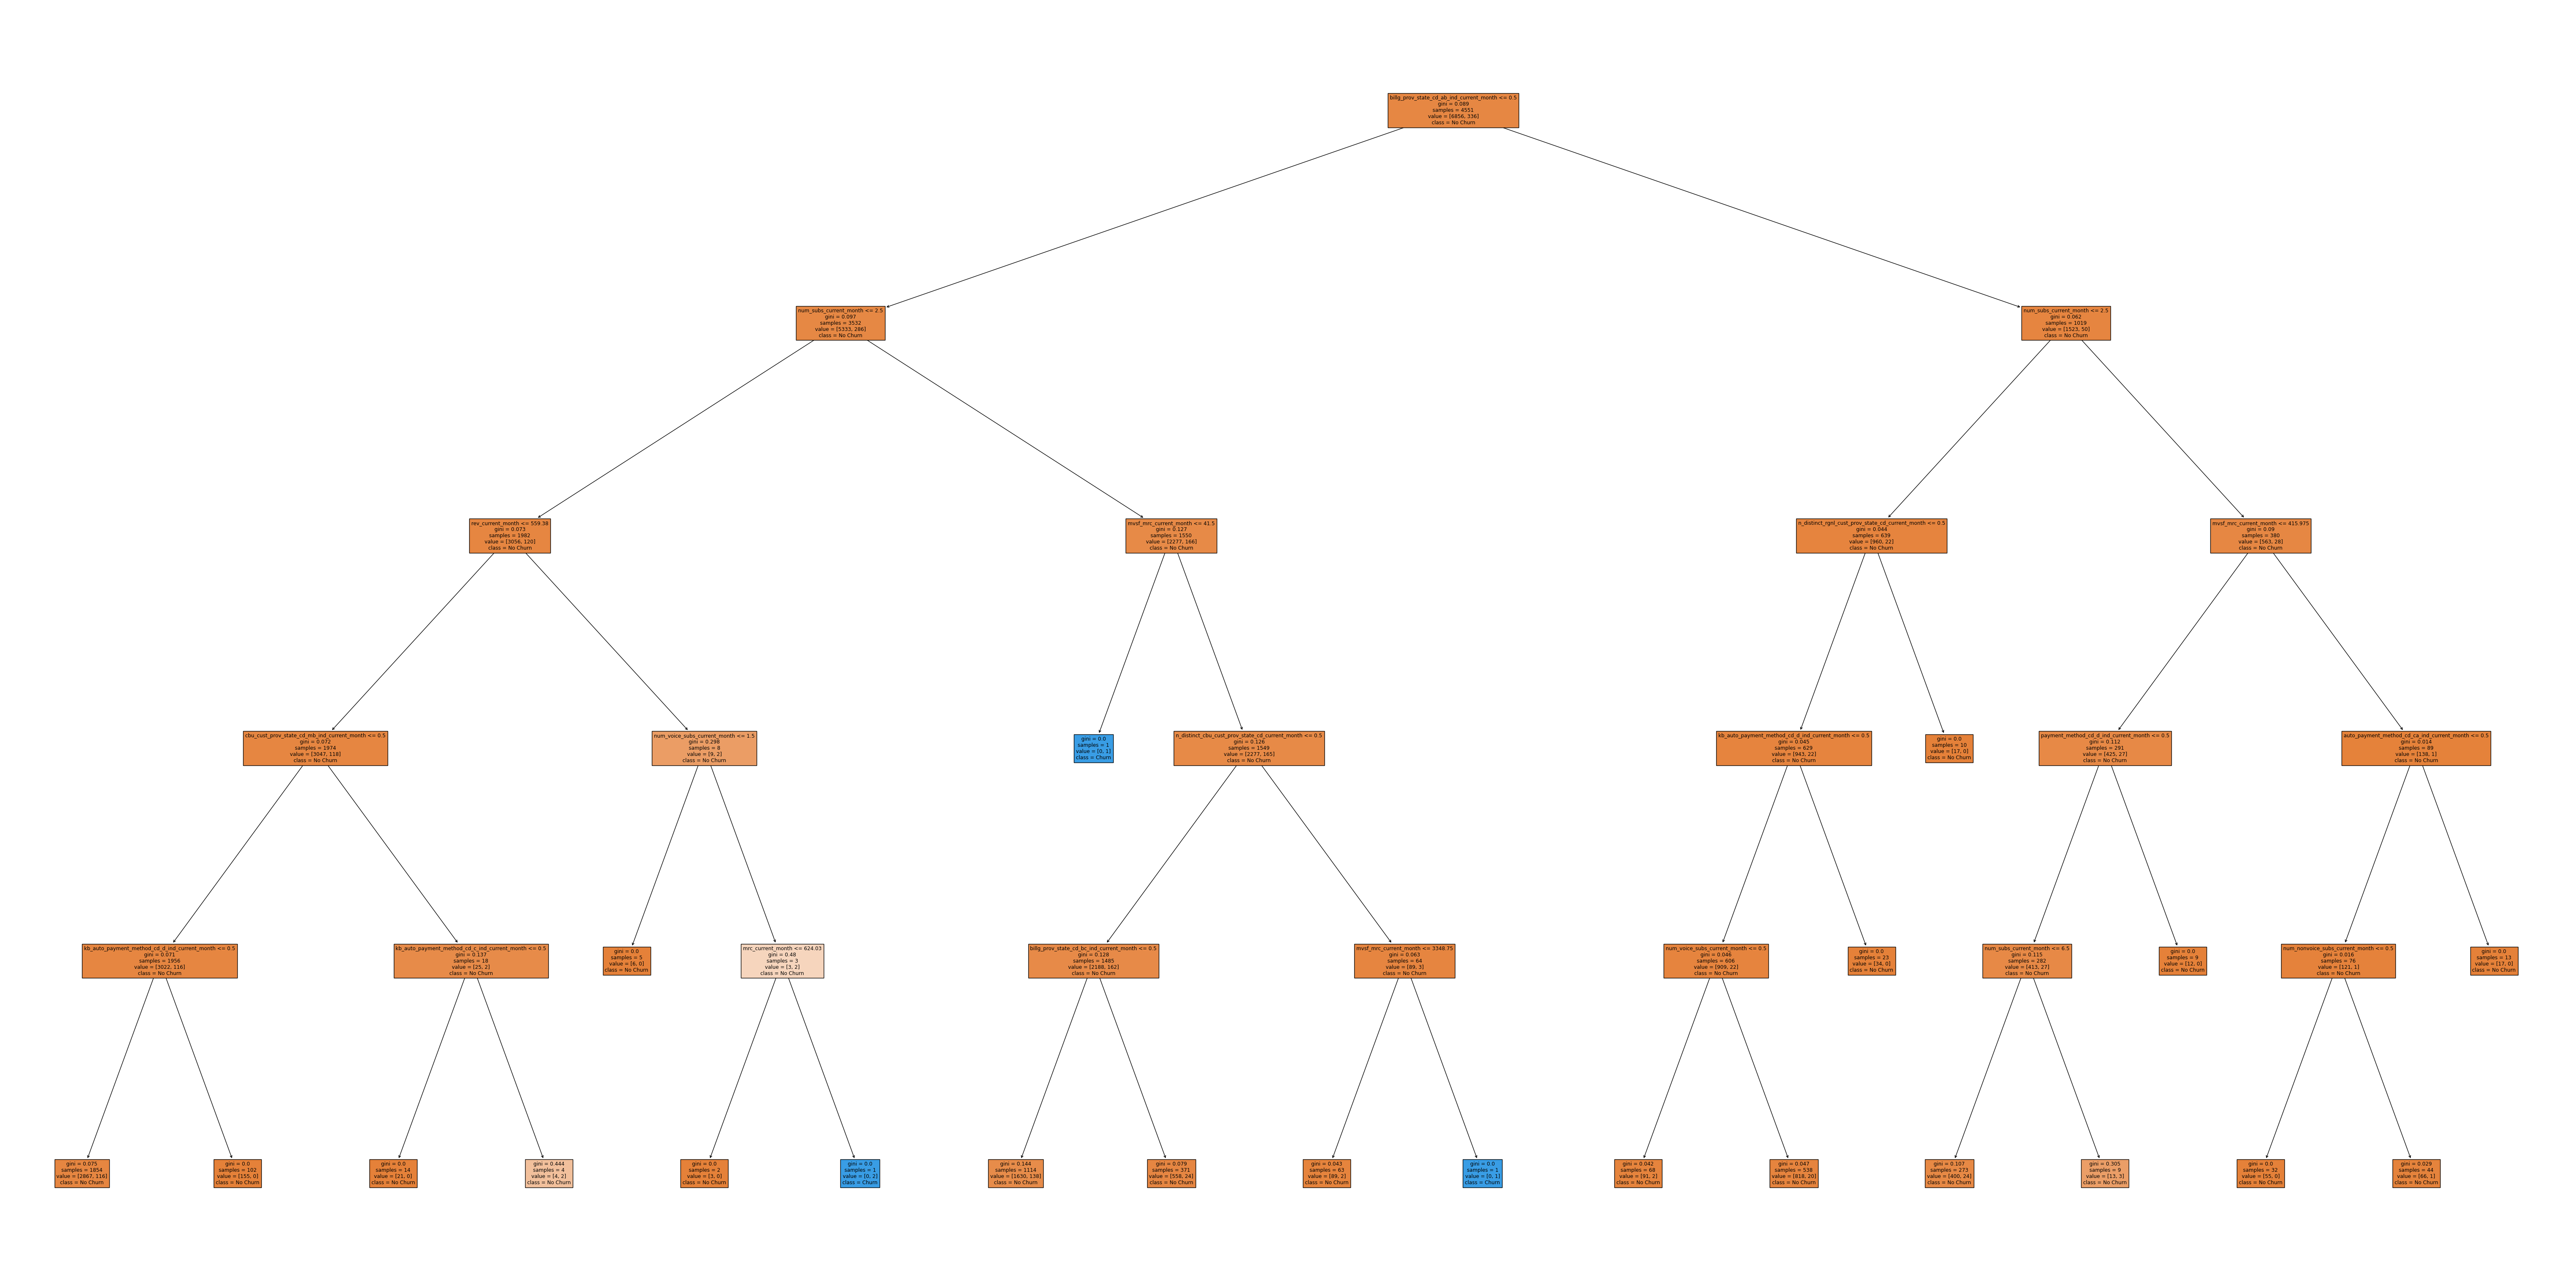

In [104]:
# Visualizing the tree
from sklearn.tree import plot_tree

plt.figure(figsize=(80,40))
plot_tree(classifier_rf[1], feature_names = X_train.columns,class_names=['No Churn', "Churn"],filled=True);

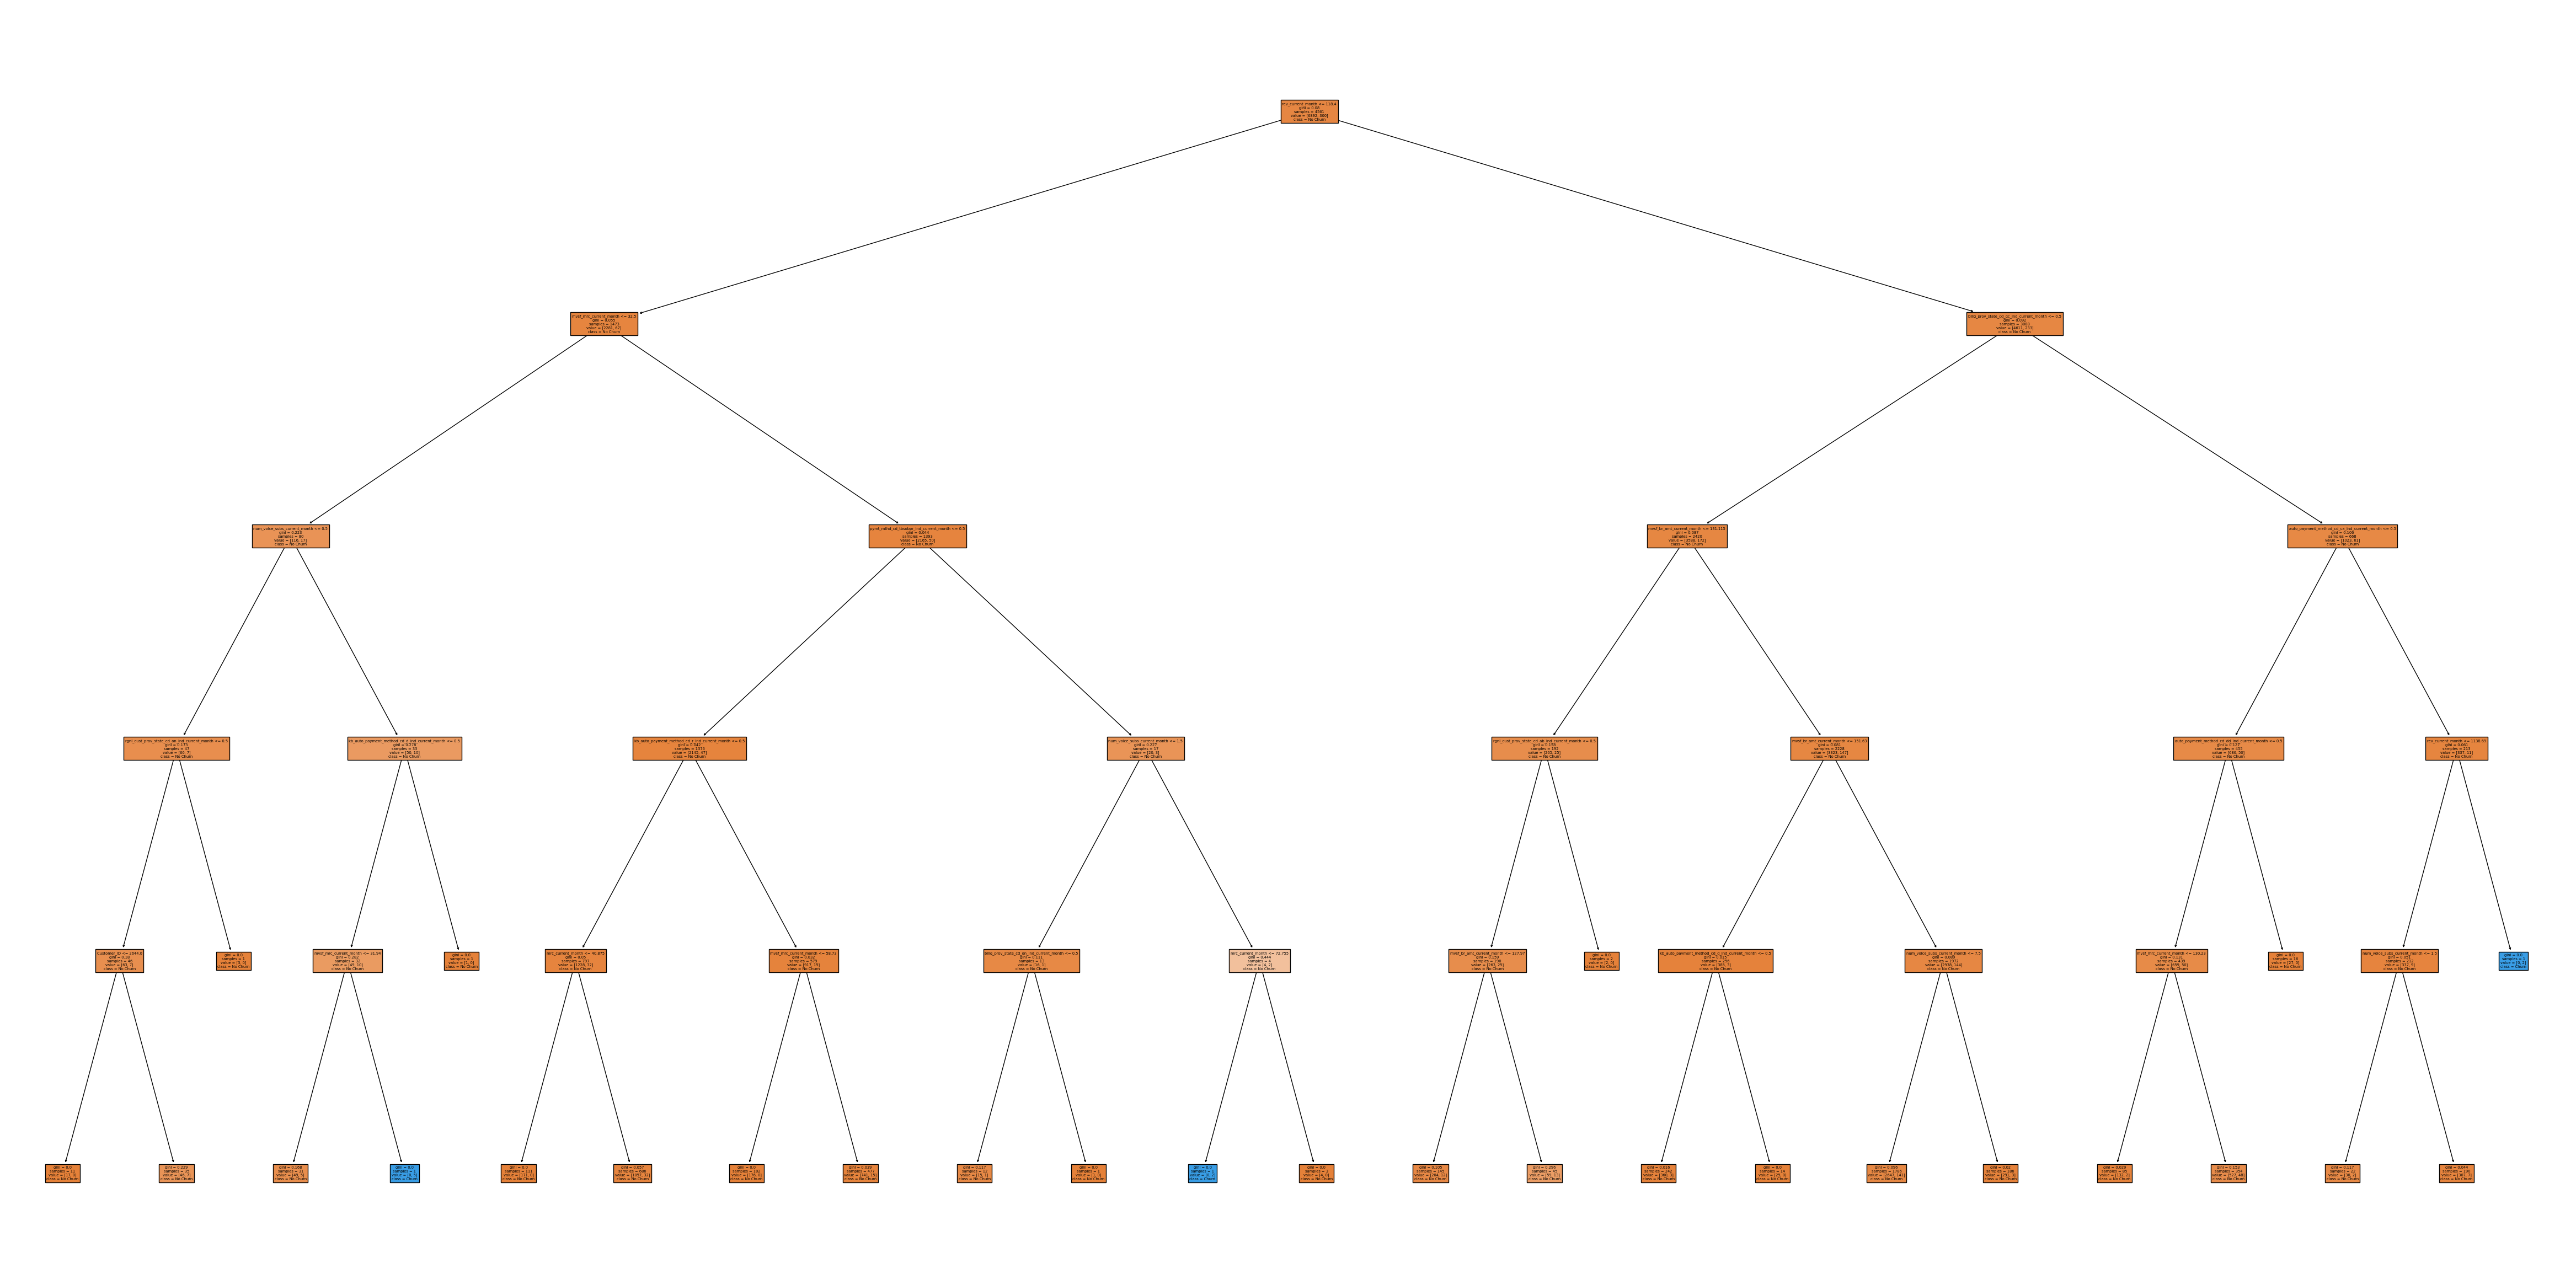

In [107]:
# Let's plot another random forest tree
plt.figure(figsize=(60,30))
plot_tree(classifier_rf[5], feature_names = X_train.columns,class_names=['No Churn', "Churn"],filled=True);

## Random Forest Model + PCA (n = 2)

In [73]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf_pca_2 = RandomForestClassifier(random_state=23,
                                                n_jobs=-1,
                                                max_depth=5,
                                                n_estimators=100,
                                                oob_score=True)

# OOB score refers to Out Of the Bag Score

In [84]:
%%time
# above line shows how to see the execution time of the cell

#first training the model with only 2 dimentions
classifier_rf_pca_2.fit(X_train_pca_2, y_train)

CPU times: user 321 ms, sys: 77.2 ms, total: 399 ms
Wall time: 159 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=23)

In [86]:
y_train_pred_2 = classifier_rf_pca_2.predict(X_train_pca_2)

In [87]:
# let's also check the accuracy score 
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_pred_2)

0.9574527252502781

In [79]:
# This accuracy looks promising however, let us see if we get similar accuracy in the test set
y_test_pred_2 = classifier_rf_pca_2.predict(X_test_pca_2)

In [80]:
accuracy_score(y_test, y_test_pred_2)

0.9545454545454546

The training and testing accuracy using PCA with n_components = 2 has given around 95% accuracy. This shows that the model is not overfitting the data.

## Random Forest + PCA (n = 5)

In [82]:
#similarly training the model with PCA (n = 5)
classifier_rf_pca_5 = RandomForestClassifier(random_state=23,
                                                n_jobs=-1,
                                                max_depth=5,
                                                n_estimators=100,
                                                oob_score=True)

In [88]:
%%time

classifier_rf_pca_5.fit(X_train_pca_5, y_train)

CPU times: user 482 ms, sys: 78.3 ms, total: 560 ms
Wall time: 198 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=23)

In [89]:
y_train_pred_5 = classifier_rf_pca_5.predict(X_train_pca_5)

In [90]:
accuracy_score(y_train, y_train_pred_5)

0.957313681868743

In [96]:
y_test_pred_5 = classifier_rf_pca_5.predict(X_test_pca_5)
accuracy_score(y_test, y_test_pred_5)

0.9545454545454546

We can see that the accuracy of the Random Forest + PCA (n=5) model is very similar to the previous model with around 95% accuracy in training and testing.

## Features Driving The Churn

In [108]:
# We can use Random Forest's Feature Importance feature
# Let us try to see the imoprtant features from the Random Forest 

classifier_rf.feature_importances_

array([1.04346956e-01, 1.15669217e-01, 1.05419702e-01, 1.33893219e-01,
       6.06990482e-02, 7.29860140e-02, 3.59241082e-02, 1.23576104e-01,
       2.47072634e-03, 0.00000000e+00, 0.00000000e+00, 1.20551082e-03,
       0.00000000e+00, 5.35340668e-03, 5.12362402e-03, 9.69824394e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.58582647e-06,
       7.05855182e-06, 0.00000000e+00, 0.00000000e+00, 5.11580637e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.06662413e-02, 5.70260866e-03, 5.51155553e-03, 7.83984896e-03,
       4.65199621e-06, 4.83056518e-03, 0.00000000e+00, 0.00000000e+00,
       1.70043229e-02, 1.29172891e-03, 6.85003814e-03, 1.43598748e-03,
       2.97340929e-06, 9.09079758e-03, 1.03859349e-03, 3.66003118e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.42697203e-02, 0.00000000e+00, 3.41171614e-04,
       5.94505478e-06, 0.00000000e+00, 4.56318833e-03, 1.49433272e-04,
      

In [110]:
# Visualizing the above data in a better way:
important_features_rf = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance Score": classifier_rf.feature_importances_
})

important_features_rf.sort_values(by="Importance Score", ascending=False)


,Feature Name,Importance Score
3,mvsf_mrc_current_month,0.133893
7,rev_current_month,0.123576
1,mrc_current_month,0.115669
2,mvsf_br_amt_current_month,0.105420
0,Customer_ID,0.104347
...,...,...
67,pymt_mthd_cd_cc_ind_current_month,0.000000
66,cbu_cust_prov_state_cd_yt_ind_current_month,0.000000
65,cbu_cust_prov_state_cd_sk_ind_current_month,0.000000
63,cbu_cust_prov_state_cd_pe_ind_current_month,0.000000


In [133]:
important_features_rf_pca_2 = pd.DataFrame({
    "Feature Number": [i for i in range (0,2)],
    "Importance Score": classifier_rf_pca_2.feature_importances_
})

important_features_rf_pca_2.sort_values(by="Importance Score", ascending=False)


,Feature Number,Importance Score
1,1,0.509535
0,0,0.490465


From the above we can see that both feature 1 and 2 from the PCA (n=2) are almost equally important while training the model.

In [134]:
important_features_rf_pca_5 = pd.DataFrame({
    "Feature Number": [i for i in range (0,5)],
    "Importance Score": classifier_rf_pca_5.feature_importances_
})

important_features_rf_pca_5.sort_values(by="Importance Score", ascending=False)


,Feature Number,Importance Score
3,3,0.246596
1,1,0.207754
0,0,0.182833
2,2,0.181818
4,4,0.181000


From the above we can see that both feature 3 and 1 from the PCA (n=5) have a significance more than 20%. And the other three have a significance score of 18%.